# MMAE 500 - Homework 3
# Jay Steinberg

Some code snippets were taken from the class examples and repurposed here

In [ ]:
import numpy as np
import scipy as sp
from numpy import linalg as la
from scipy.linalg import qr
from matplotlib import cm
from matplotlib import pyplot as plt
from scipy import io

# Q1: QR Pivoting

In [ ]:
# Original generation of X from given code in hw3Q1.ipynb

y = np.linspace(-2,2,401) # spatial coordinate
Ny = np.size(y)

amp1 = 1
y01 = 0.5
sigmay1 = 0.6

amp2 = 1.2
y02 = -0.5
sigmay2 = 0.3

dt = 0.1
Nt = 101
tend = dt*(Nt-1)
t = np.linspace(0,tend,Nt) # time

omega1 = 1.3
omega2 = 4.1

v1 = amp1*np.exp(-((y-y01)**2)/(2*sigmay1**2))
v2 = amp2*np.exp(-((y-y02)**2)/(2*sigmay2**2))

X = np.zeros([Ny,Nt],dtype=complex)
for tt in range(Nt):
    X[:,tt] = v1*np.cos(omega1*t[tt])+v2*np.cos(omega2*t[tt]) 

Original X:
 [[0.00017433+0.j 0.00017252+0.j 0.0001672 +0.j ... 0.00016377+0.j
  0.00015775+0.j 0.00014972+0.j]
 [0.00018733+0.j 0.00018535+0.j 0.00017953+0.j ... 0.00017514+0.j
  0.0001686 +0.j 0.00015998+0.j]
 [0.00020128+0.j 0.00019912+0.j 0.00019275+0.j ... 0.00018721+0.j
  0.0001801 +0.j 0.00017085+0.j]
 ...
 [0.04772871+0.j 0.04732597+0.j 0.04612454+0.j ... 0.04701107+0.j
  0.04554548+0.j 0.04331126+0.j]
 [0.04579995+0.j 0.04541349+0.j 0.04426062+0.j ... 0.04511132+0.j
  0.04370495+0.j 0.04156102+0.j]
 [0.04393693+0.j 0.04356619+0.j 0.04246021+0.j ... 0.04327631+0.j
  0.04192715+0.j 0.03987043+0.j]] 

Optimal Sampling Locations:
 [149 250] 

Reconstructed X from QR Pivot:
 [[0.00017433+0.j 0.00017252+0.j 0.0001672 +0.j ... 0.00016377+0.j
  0.00015775+0.j 0.00014972+0.j]
 [0.00018733+0.j 0.00018535+0.j 0.00017953+0.j ... 0.00017514+0.j
  0.0001686 +0.j 0.00015998+0.j]
 [0.00020128+0.j 0.00019912+0.j 0.00019275+0.j ... 0.00018721+0.j
  0.0001801 +0.j 0.00017085+0.j]
 ...
 [0.047728

/usr/local/lib/python3.9/dist-packages/matplotlib/contour.py:1454: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmax = float(z.max())
/usr/local/lib/python3.9/dist-packages/matplotlib/contour.py:1455: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmin = float(z.min())
/usr/local/lib/python3.9/dist-packages/numpy/ma/core.py:2826: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,
<ipython-input-21-1d94487c655a>:25: UserWarning: The following kwargs were not used by contour: 'label'
  axs[0].contourf(X,nlevels,cmap="RdBu_r", label='Original X')
/usr/local/lib/python3.9/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
<ipython-input-21-1d94487c655a>:28: UserWarning: The following kwargs were not used by contour: 'label'
  axs[1].contourf(XEst

Text(0.5, 1.0, 'Error')

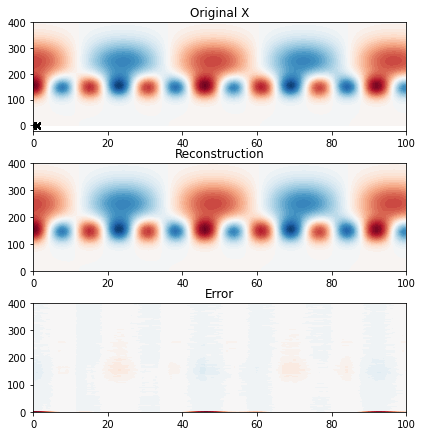

In [ ]:
# Use QR pivoting to find optimal sensing locations

print('Original X:\n', X, '\n')

r=2
U,Sigma,VT = la.svd(X,full_matrices=0)
Ur = U[:,:r] 

Q,R,P = qr(np.transpose(Ur),pivoting=True)
optimalSampleLocations = P[:r] 

print('Optimal Sampling Locations:\n', optimalSampleLocations, '\n')

# Do reconstruction with these measurements
OptimalMeasurements = X[optimalSampleLocations]
cOpt = la.pinv(Ur[optimalSampleLocations,:])@OptimalMeasurements
#print(cOpt)

# Reconstruct full state from optimal measurements
XEstimatedOpt = Ur@cOpt
XEstError=XEstimatedOpt-X
print('Reconstructed X from QR Pivot:\n', XEstimatedOpt, '\n')
print('Error, reconstruction minus original:\n', XEstError)

figs, axs = plt.subplots(3,1, figsize=(6,6))
figs.tight_layout()
nlevels = 50
axs[0].contourf(X,nlevels,cmap="RdBu_r", label='Original X')
axs[0].set_title("Original X")
axs[0].plot(X[optimalSampleLocations],'kx')
axs[1].contourf(XEstimatedOpt,nlevels,cmap="RdBu_r", label="Reconstructed")
axs[1].set_title("Reconstruction")
axs[2].contourf(XEstError,nlevels,cmap="RdBu_r", label="Error")
axs[2].set_title("Error")

# Q2: Compressed Sensing

In [ ]:
b = np.genfromtxt('/content/hw3Q2b.dat')
C = np.genfromtxt('/content/hw3Q2C.dat', dtype=None, delimiter=",")

x = la.pinv(C) @ b
print(x)

[-0.08152695  0.05321636 -0.0447947  -0.01765515  0.01264836  0.04479523
  0.01336476 -0.05514886  0.01775492  0.02157766 -0.00843007  0.00726139
  0.06836892 -0.02068811 -0.02550181 -0.02041082  0.01358207 -0.07600245
 -0.03125131  0.03164406  0.04215401 -0.02019882 -0.0040449   0.00392143
 -0.01858262  0.03883848  0.0184489  -0.02981506 -0.07277108  0.01191321
  0.01018723 -0.03187005  0.01682108 -0.06758887  0.07139502 -0.02709005
 -0.03433671 -0.03281231  0.04032397 -0.04805167  0.04553667  0.04194345
 -0.01725231 -0.031068    0.02607901 -0.02619616  0.05428877 -0.02401123
  0.03338464  0.00266361 -0.00319004 -0.02583664 -0.00221132 -0.02747604
  0.08408186 -0.07083523  0.01700155 -0.0857161  -0.06483806  0.03394729
  0.0205334  -0.02627315 -0.02993275 -0.0016009   0.00713589  0.03472257
 -0.01637809 -0.00472963 -0.0133218   0.02150945 -0.10133274 -0.0185915
  0.01551494 -0.01056131  0.04757769  0.01254535 -0.00088493 -0.02652978
 -0.0239831  -0.03093972 -0.02945505  0.00958694  0.

In [ ]:
# Note: I think this should actually use a pivoted QR (compressed sensing) but I have run out of time

Q,R,P = qr(np.transpose(C),pivoting=True)

print(C)


[[0 0 0 ... 1 0 0]
 [0 0 1 ... 0 0 0]
 [1 1 1 ... 1 0 0]
 ...
 [1 1 1 ... 0 0 1]
 [1 0 1 ... 1 0 0]
 [1 0 1 ... 1 0 0]]


# Q3: SINDy

In [ ]:
# load data
data = sp.io.loadmat('/content/DataHw3Q3.mat')

t= data['t']
x = data['x']
x1 = np.array(x[:,0])
x2 = np.array(x[:,1])

x1_dot = np.zeros_like(x1)
x2_dot = np.zeros_like(x2)

# fill theta matrix

theta = np.zeros((np.size(t), 16))

x=0
for j in range (0,4):
  for k in range (0,4):
    theta[:,x] = x1**j * x2**k
    x+=1

# want to solve system:
# c = theta(x)^+ * x1_dot
# d = theta(x)^+ * x2_dot
# however, we don't know x1_dot or x2_dot unlike the class example
# use left difference method to compute x1_dot, x2_dot

for q in range(np.size(t)-1):
  x1_dot[q] = (x1[q+1]-x1[q])/(t[q+1]-t[q])
  x2_dot[q] = (x2[q+1]-x2[q])/(t[q+1]-t[q])

In [ ]:
## SINDy Function Definitions (modified code snippet from class example)

def sparsifyDynamics(Theta,dXdt,lamb):
    Xi = np.linalg.lstsq(Theta,dXdt,rcond=None)[0] # Initial guess: Least-squares
    # print(np.shape(Xi))
    for k in range(10):
        smallinds = np.abs(Xi) < lamb # Find small coefficients
        Xi[smallinds] = 0                          # and threshold
        # print(smallinds)
        biginds = smallinds == 0
        # print(biginds)
        # Regress dynamics onto remaining terms to find sparse Xi
        Xi[biginds] = np.linalg.lstsq(Theta[:,biginds],dXdt,rcond=None)[0]
            
    return Xi

In [ ]:
n = 2
lamb = 0.025 # 0.025 # sparsification knob lambda
# print(np.shape(theta))
# print(np.shape(x1_dot))
# print(np.shape(x2_dot))

C = sparsifyDynamics(theta,x1_dot,lamb)
D = sparsifyDynamics(theta,x2_dot,lamb)

print('C coeffs:\n', C,'\n\nD Coeffs:\n', D)

C coeffs:
 [ 0.55784962 -0.97594704 -0.0590032  -0.1279559   0.92601875 -0.0555449
  0.34959467  0.19208439 -0.04280142  0.         -0.16058623 -0.25258823
 -0.30345877  0.04390815 -0.06253336  0.14131866] 

D Coeffs:
 [ 0.         -0.16144481  0.          0.          0.19989993  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.        ]
